Previously, we had a taste of how a DNN would work.

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist

In [5]:
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()
train_imgs=train_imgs / 255.0
test_imgs=test_imgs / 255.0

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                            ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_imgs, train_labels, epochs=5)

test_loss = model.evaluate(test_imgs, test_labels)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4994 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3755 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3371 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3148 - accuracy: 0.8853
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8766


The result was not bad at all, getting 89% on training and 87% on testing. In this lession we would like to imrpove the results further by using CNN.

The objective of CNN is to narrow down the content of the image to focus on specific, distinct, details. We will see an example below:





Step 1 is to gather the data. You'll notice that there's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape.

In [2]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

2.2.0
4423680/4422102 [==============================] - 0s 0us/step


Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

1. The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32
2. The size of the Convolution, in this case a 3x3 grid
3. The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
4. In the first layer, the shape of the input data.

You'll follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image by 25%.

You can call model.summary() to see the size and shape of the network, and you'll notice that after every MaxPooling layer, the image size is reduced in this way. 


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```

In [3]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
                                  ])

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

# Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [5]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


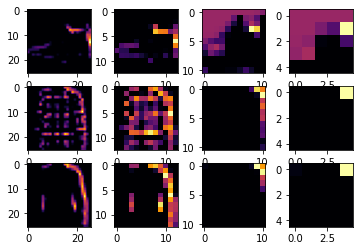

In [6]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

The speed of training would increase as we decrease number of the filter, and the performance would increase as we increase the number of the filter, but the performance generally speaking would flatten out


In [8]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.2.0
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1566 - accuracy: 0.9540
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0545 - accuracy: 0.9836
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0341 - accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0210 - accuracy: 0.9933
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0155 - accuracy: 0.9951
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0111 - accuracy: 0.9964
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0079 - accuracy: 0.9977
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0078 - accuracy: 0.9972
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0053 - accuracy: 0.9983
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0

In [9]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1715 - accuracy: 0.9494
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0580 - accuracy: 0.9824
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0387 - accuracy: 0.9877
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0267 - accuracy: 0.9920
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0129 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0095 - accuracy: 0.9969
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0064 - accuracy: 0.9979
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0608 

In [10]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1376 - accuracy: 0.9578
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0484 - accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0290 - accuracy: 0.9907
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0188 - accuracy: 0.9942
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0125 - accuracy: 0.9960
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0101 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0066 - accuracy: 0.9977
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0061 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0052 - accuracy: 0.9981
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss

2. Remove the final Convolution. What impact will this have on accuracy or training time?
Training time is the same with accuracy a bit better


In [11]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.2.0
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1443 - accuracy: 0.9559
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0466 - accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0317 - accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0234 - accuracy: 0.9922
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0185 - accuracy: 0.9938
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0133 - accuracy: 0.9959
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0121 - accuracy: 0.9958
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0087 - accuracy: 0.9971
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0083 - accuracy: 0.9969
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.



In [12]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.2.0
Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2617 - accuracy: 0.9177
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0966 - accuracy: 0.9707
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0725 - accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0579 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0475 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0417 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0357 - accuracy: 0.9885
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0320 - accuracy: 0.9897
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0284 - accuracy: 0.9907
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 



In [13]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.2.0
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1469 - accuracy: 0.9560
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0486 - accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0310 - accuracy: 0.9902
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0206 - accuracy: 0.9934
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0145 - accuracy: 0.9954
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0100 - accuracy: 0.9969
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0082 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0054 - accuracy: 0.9984
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0055 - accuracy: 0.9981
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!